<a href="https://colab.research.google.com/github/KevinCantrell/Pennies/blob/master/Pennies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import tkinter as tk
from tkinter.filedialog import askopenfilename
import pandas as pd
import seaborn as sns

url = 'https://raw.githubusercontent.com/KevinCantrell/Pennies/master/SharedPennyData.csv'
pennyDF = pd.read_csv(url)
pennyDF['Type']='Cu'
pennyDF.loc[pennyDF['Mass']<2.8,'Type']='Zn'
print(pennyDF)

     Year  Mass       Dia   Light    Hue Analyst Mint Type
0    1997  2.49  0.745173  150.43  67.67     KMC    D   Zn
1    1977  3.08  0.737371   96.94  70.13     KMC    N   Cu
2    1992  2.45  0.735257  105.05  67.82     KMC    D   Zn
3    2008  2.47  0.717724  116.43  68.49     KMC    N   Zn
4    2016  2.48  0.741623  158.07  68.53     KMC    D   Zn
..    ...   ...       ...     ...    ...     ...  ...  ...
185  1930  2.96  0.728596   37.12  76.38    AAKN    D   Cu
186  1981  3.11  0.755914   42.84  76.07    AAKN    D   Cu
187  1972  3.12  0.756642   55.38  76.87    AAKN    D   Cu
188  1965  3.03  0.694863   40.48  77.21    AAKN    N   Cu
189  1982  3.06  0.650960   37.22  76.62    AAKN    D   Cu

[190 rows x 8 columns]


In [45]:
ByTypeSummary=pennyDF.groupby(['Type']).describe(percentiles=[])
pd.set_option('display.max_columns', None)
print(ByTypeSummary[:5])

       Year                                                   Mass            \
      count         mean        std     min     50%     max  count      mean   
Type                                                                           
Cu     71.0  1969.169014  15.507589  1888.0  1974.0  1982.0   71.0  3.083944   
Zn    119.0  2005.411765  11.313268  1982.0  2006.0  2020.0  119.0  2.495630   

                                   Dia                                \
           std   min  50%   max  count      mean       std       min   
Type                                                                   
Cu    0.043408  2.94  3.1  3.16   71.0  0.747975  0.027766  0.641095   
Zn    0.021654  2.42  2.5  2.57  119.0  0.746772  0.032814  0.494422   

                          Light                                              \
           50%       max  count       mean        std    min    50%     max   
Type                                                                          
C

      count      mean       std   min   25%  50%    75%   max
Type                                                         
Cu     71.0  3.083944  0.043408  2.94  3.06  3.1  3.115  3.16
Zn    119.0  2.495630  0.021654  2.42  2.48  2.5  2.510  2.57


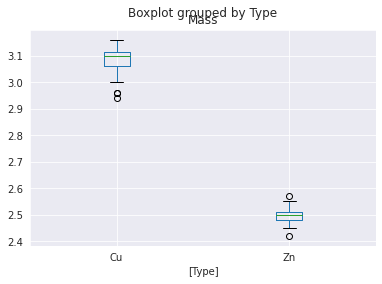

In [46]:
MassByTypeSummary=pennyDF.groupby(['Type'])['Mass'].describe()
print(MassByTypeSummary)
pennyDF.boxplot(column="Mass",by=['Type'])

      count       mean       std    min     25%    50%     75%    max
Type                                                                 
Cu     71.0  74.736901  2.303054  67.36  73.840  75.22  76.075  79.22
Zn    119.0  71.826303  2.068135  64.52  70.955  71.74  73.120  79.61


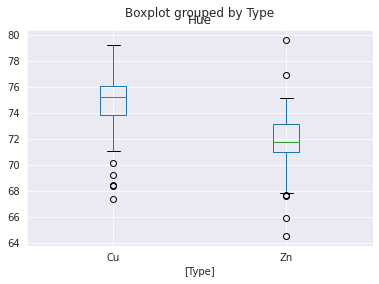

In [47]:
HueByTypeSummary=pennyDF.groupby(['Type'])['Hue'].describe()
print(HueByTypeSummary)
pennyDF.boxplot(column="Hue",by=['Type'])

Cu mass skew = -1.2381015582973485
Zn mass skew = 0.1317875933824354


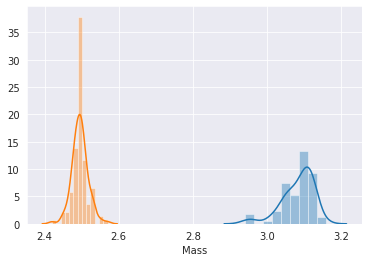

In [48]:
print("Cu mass skew = "+str(pennyDF["Mass"][pennyDF['Type']=="Cu"].skew()))
print("Zn mass skew = "+str(pennyDF["Mass"][pennyDF['Type']=="Zn"].skew()))

sns.set_style('darkgrid')
sns.distplot(pennyDF["Mass"][pennyDF['Type']=="Cu"])
sns.distplot(pennyDF["Mass"][pennyDF['Type']=="Zn"])


              count      mean       std
Type Analyst                           
Cu   AAKN       5.0  3.056000  0.065038
     AKH        3.0  3.026667  0.090185
     AMP        3.0  3.093333  0.023094
     BMY        4.0  3.097500  0.033040
     BQH        3.0  3.110000  0.000000
     EIG        4.0  3.117500  0.020616
     EJK        1.0  3.080000       NaN
     JPW        6.0  3.045000  0.056480
     KMC        4.0  3.077500  0.030957
     LEG        5.0  3.076000  0.051769
     MKM        7.0  3.075714  0.041975
     MMG        6.0  3.093333  0.034448
     PHN        5.0  3.116000  0.015166
     QMB        1.0  3.080000       NaN
     TVN        4.0  3.110000  0.016330
     VTT        3.0  3.086667  0.015275
     ZKP        4.0  3.092500  0.033040
     acs        3.0  3.090000  0.026458
Zn   AAKN       5.0  2.496000  0.020736
     AKH        7.0  2.494286  0.015119
     AMP        7.0  2.498571  0.020354
     BMY        6.0  2.506667  0.032660
     BQH        7.0  2.497143  0.021381


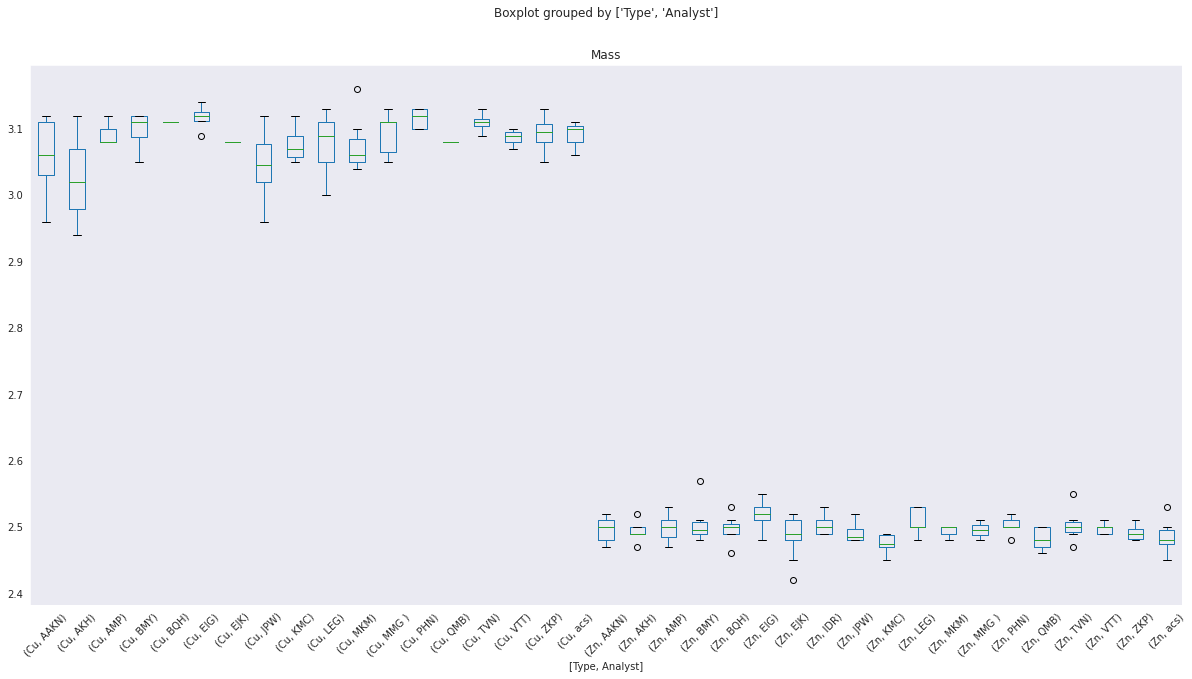

In [50]:
MassByTypeAnaSummary=pennyDF.groupby(['Type','Analyst'])['Mass'].describe()[['count','mean','std']]
print(MassByTypeAnaSummary)
pennyDF.boxplot(column="Mass",by=['Type','Analyst'],rot=45,grid=False,figsize=(20,10))

      count      mean       std
Year                           
1888    1.0  3.020000       NaN
1930    1.0  2.960000       NaN
1937    1.0  3.120000       NaN
1940    1.0  2.960000       NaN
1945    3.0  3.103333  0.073711
...     ...       ...       ...
2016    3.0  2.493333  0.015275
2017    6.0  2.498333  0.021370
2018    5.0  2.490000  0.007071
2019    7.0  2.508571  0.016762
2020   11.0  2.500909  0.012210

[63 rows x 3 columns]


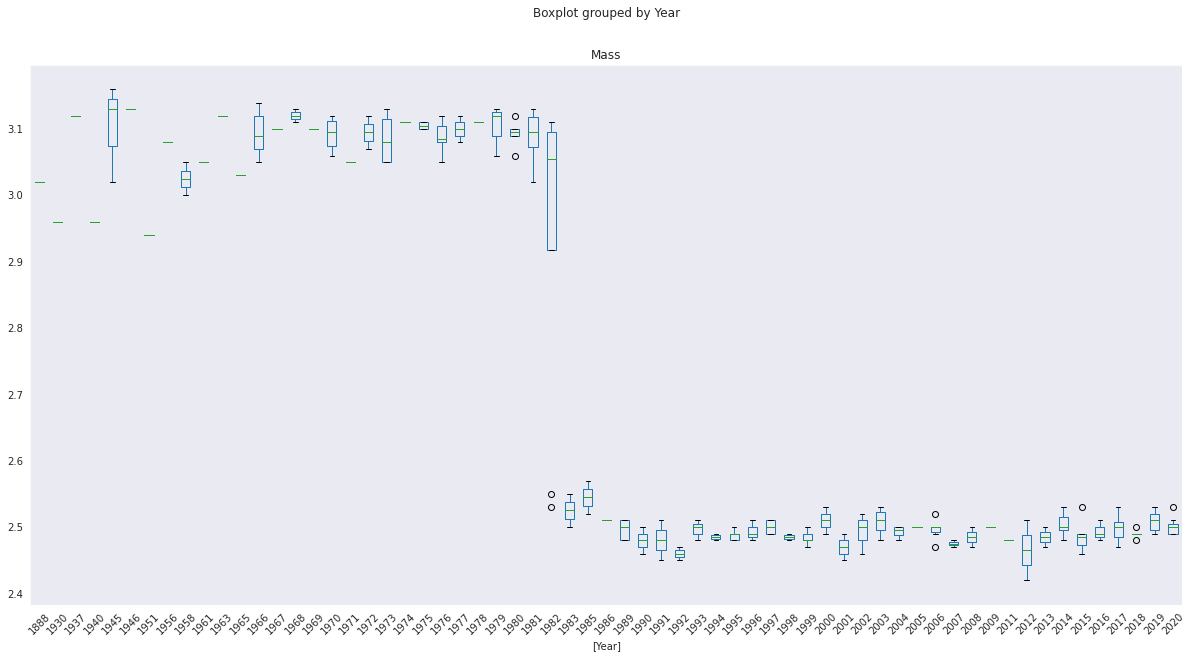

In [51]:
MassByYearSummary=pennyDF.groupby(['Year'])['Mass'].describe()[['count','mean','std']]
print(MassByYearSummary)
pennyDF.boxplot(column="Mass",by=['Year'],rot=45,grid=False,figsize=(20,10))